In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest



In [16]:
MIN = pd.read_csv("min.csv")
HOUR = pd.read_csv("hour.csv")
DAY = pd.read_csv("day.csv")
WEEK = pd.read_csv("week.csv")
MONTH = pd.read_csv("month.csv")

In [ ]:
#####CHECK FOR COMPLETENESS
#>> MIN Dataset is missing 2024 and 2025 is only per day

#others not checked

In [2]:
# Update DF
#MIN, HOUR, DAY, WEEK, MONTH = Mandelbrot.historical_datasets(crypto="BTC", curr="EUR")

downloading the EUR price/m for BTC from https://www.cryptodatadownload.com/cdd/Binance_BTCEUR_minute.csv....
downloading the EUR price/m for BTC from yfinance....
-----------------------------------------------------------------------
  date_x  open_x  high_x  low_x  close_x  volume_x  dividends  stock splits  \
0    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
1    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
2    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
3    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   
4    NaT     NaN     NaN    NaN      NaN       NaN        NaN           NaN   

         unix               date_y   symbol    open_y    high_y     low_y  \
0  1609700280  2021-01-03 18:58:00  BTC/EUR  25990.84  26014.45  25952.41   
1  1609700340  2021-01-03 18:59:00  BTC/EUR  25997.85  26087.32  25994.39   
2  1609700400  2021-01-03 19:00:00  BTC/EUR  26028.02  260

In [21]:
import yfinance as yf

data_min = yf.download("BTC", start="2024-01-01", end="2024-01-07",  interval = "1m")
data_min.head()

/tmp/ipykernel_16818/2836864390.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_min = yf.download("BTC", start="2024-01-01", end="2024-01-07",  interval = "1m")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC']: YFPricesMissingError('possibly delisted; no price data found  (1m 2024-01-01 -> 2024-01-07) (Yahoo error = "Data doesn\'t exist for startDate = 1704085200, endDate = 1704603600")')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC,BTC,BTC,BTC,BTC,BTC
Date,,,,,,


In [18]:
#drop unix duplicates

MIN_unique = MIN.drop_duplicates(subset=['unix'])



MIN_unique.tail()


,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low
3168650,3168650,1751500800,2025-07-03 00:00:00,491995136.0,92312.656250,92312.656250,60.453125,60.453125
3169870,3169870,1751587200,2025-07-04 00:00:00,0.0,93199.250000,93199.250000,71.757812,71.757812
3171088,3171088,1751673600,2025-07-05 00:00:00,23019520.0,91713.664062,91713.664062,-25.117188,-20.765625
3172239,3172239,1751760000,2025-07-06,4771840.0,91893.156250,91893.156250,1.578125,1.578125
3173458,3173458,1751846400,2025-07-07,798799872.0,92664.484375,92643.046875,-24.937500,-46.375000


In [19]:
MIN_unique.tail(15)

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low
3164437,3164437,1704052500,2023-12-31 19:55:00,3.534575e-01,38665.780000,38638.540000,-5.370000,-26.360000
3164438,3164438,1704052560,2023-12-31 19:56:00,1.896024e-02,38648.020000,38630.060000,-17.760000,-8.480000
3164439,3164439,1704052620,2023-12-31 19:57:00,7.089699e-01,38653.280000,38624.110000,5.260000,-5.950000
3164440,3164440,1704052680,2023-12-31 19:58:00,5.254795e-02,38636.840000,38628.530000,-16.440000,4.420000
3164441,3164441,1704052740,2023-12-31 19:59:00,8.817610e-03,38638.010000,38635.950000,1.170000,7.420000
3164442,3164442,1704052800,2023-12-31 20:00:00,8.777520e-03,38643.870000,38632.860000,5.860000,-3.090000
3164443,3164443,1751155200,2025-06-29 00:00:00,0.000000e+00,92386.398438,92379.859375,53742.528437,53746.999375
3165050,3165050,1751241600,2025-06-30 00:00:00,6.459802e+07,92515.523438,92515.523438,103.132812,103.132812
3166276,3166276,1751328000,2025-07-01 00:00:00,1.017037e+07,90301.601562,90301.601562,-585.953125,-585.953125
3167458,3167458,1751414400,2025-07-02 00:00:00,1.157939e+07,89589.296875,89589.296875,157.781250,157.781250


In [17]:
print(len(MIN))
#print(len(MIN_unique))

3174065


In [30]:
##Backup --> save as csv and load csv

MIN_new.to_csv("min.csv")
HOUR_new.to_csv("hour.csv")
DAY.to_csv("day.csv")
WEEK.to_csv("week.csv")
MONTH.to_csv("month.csv")


In [ ]:
plt.plot(MIN['date'],MIN['high'])
plt.show()

In [3]:
plt.plot(HOUR['date'],HOUR['high'])
plt.show()

KeyboardInterrupt: 

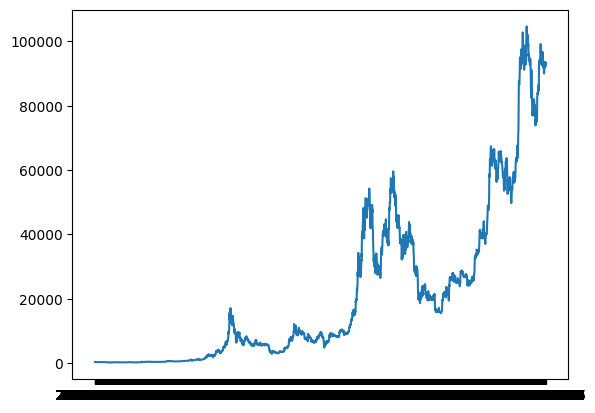

In [6]:
plt.plot(DAY['date'],DAY['high'])
plt.show()

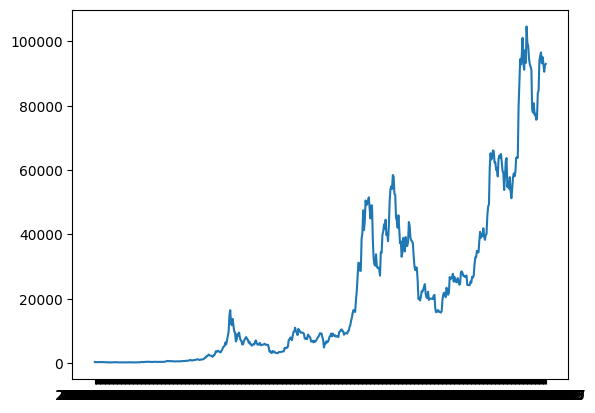

In [7]:
plt.plot(WEEK['date'],WEEK['high'])
plt.show()

In [ ]:
plt.plot(MONTH['date'],MONTH['high'])
plt.show()

In [5]:
#DF dim

print("Minute:",len(MIN))
print("Hour:",len(HOUR))
print("Day:",len(DAY))
print("Week:",len(WEEK))
print("Month:",len(MONTH))

Minute: 3174065
Hour: 53799
Day: 3947
Week: 564
Month: 130


In [7]:
print("Minute max delta:",MIN["delta_high"].max())
print("Hour max delta:",HOUR["delta_high"].max())
print("Day max delta:",DAY["delta_high"].max())
print("Week max delta:",WEEK["delta_high"].max())
print("Month max delta:",MONTH["delta_high"].max())

Minute max delta: 53742.5284375
Hour max delta: 53683.529375
Day max delta: 5684.747968750002
Week max delta: 15687.080703125
Month max delta: 25917.472968749997


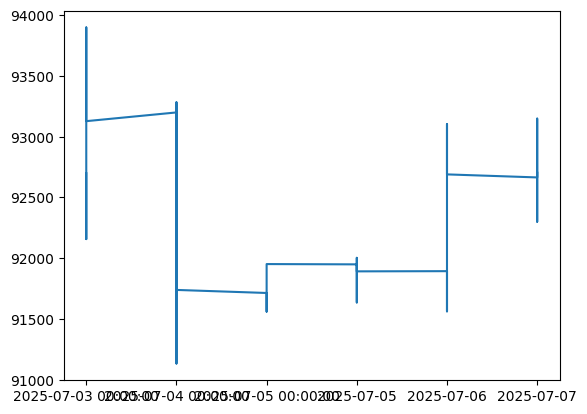

In [18]:
#Minute max delta
MIN_MAX = MIN.loc[MIN['delta_high'] == MIN["delta_high"].max()]


MIN_Tail = MIN.tail(5000)
plt.plot(MIN_Tail['date'],MIN_Tail['high'])
plt.show()

In [26]:
MIN.tail(1000)

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low
3173065,3173065,1751760000,2025-07-06,0.0,92412.492188,92412.492188,-7.179688,-7.179688
3173066,3173066,1751760000,2025-07-06,0.0,92435.367188,92434.093750,22.875000,21.601562
3173067,3173067,1751760000,2025-07-06,0.0,92412.492188,92412.492188,-22.875000,-21.601562
3173068,3173068,1751760000,2025-07-06,36489216.0,92426.906250,92426.906250,14.414062,14.414062
3173069,3173069,1751760000,2025-07-06,16719872.0,92420.593750,92420.593750,-6.312500,-6.312500
...,...,...,...,...,...,...,...,...
3174060,3174060,1751846400,2025-07-07,0.0,92681.890625,92681.890625,-22.914062,-22.914062
3174061,3174061,1751846400,2025-07-07,0.0,92669.039062,92669.039062,-12.851562,-12.851562
3174062,3174062,1751846400,2025-07-07,0.0,92709.640625,92709.640625,40.601562,40.601562
3174063,3174063,1751846400,2025-07-07,0.0,92700.031250,92700.031250,-9.609375,-9.609375


In [38]:
df = MIN

### 1. Index vs delta index / raw vs logarithm

The logarithm of the deltas gives a more informative picture than the raw index values.
-> shows the growth in relation to the overall data and suposible bull runs seem less impressive 



## Thesis 1: Logarithm Charts represents the market behaviour more truthfully

In [ ]:
fig = plt.figure(figsize=(30,20))


plt.subplot(2, 2, 1)

plt.scatter(df["date"], df["high"], s=5, label="high")
plt.scatter(df["date"], df["low"], s=5, label="low")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")

plt.ylabel("price")




plt.subplot(2, 2, 2)
plt.scatter(df["date"], Mandelbrot.log10(df["high"]), s=5, label="high")
plt.scatter(df["date"], Mandelbrot.log10(df["low"]), s=5, label="low")

#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")





plt.subplot(2, 2, 3)
plt.bar(df["date"], df["delta_high"])
 
plt.xlabel("year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")



print(Mandelbrot.log10(df["delta_high"])[0:50])

plt.subplot(2, 2, 4)
plt.bar(df["date"], Mandelbrot.log10(df["delta_high"]))

 
plt.xlabel("Year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")

plt.show()

[nan, 1.8625487695247869, -1.7730546933642573, -1.6642658001476736, 1.9261880491072008, 1.5609820555862284, 1.2538224387081296, -1.1300119496719558, -1.4383841070346934, -1.306853748693018, -1.0409976924235538, -1.4604467838807051, -1.5765716840653041, 1.1972805581256194, 1.3554515201265536, -0.8651039746412315, 1.3730959870787376, 1.4814426285022946, -1.1498346967157536, 0.8481891169913539, 1.3400473176614134, -1.169968173996918, -1.3426200425533164, -1.5932860670204654, -1.71583627516499, -1.8669368177316428, 0.6020599913279624, -1.5340261060561442, -1.3529539117101046, -1.3619166186686131, -1.449324093098718, 1.2153731527833758, 1.9830396160461106, -1.3977662561264779, -1.1061908972634302, -1.5549734583332329, -1.7839035792727298, -0.4166405073383778, -1.4942937686653206, 1.4668676203540987, -1.7337588355871887, 0.885926339801357, -0.28103336724769445, 1.8527848686805477, -1.5383223332314508, -1.4058583993176217, -1.5547313766759543, 1.7029472461815482, -0.4048337166200873, 1.732071

### Probability density function of delta values

it is widely accepted, that the values follow a normal distribution

Mandelbrot suggests, that it is rather a Cauchy distribution

Cauchy:
-> higher peak around the mean
-> no fixed variance
-> more considerate of frequent "higher" outliers (turbulences in the market)


When to Use Cauchy Instead of Gaussian?

Choose Cauchy if:

    You see extreme outliers

    Data has heavy tails (outliers that don't “go away” with more samples)

    Mean and variance don't make sense (or are misleading)

Choose Gaussian if:

    Data clusters well around a central value

    Tails decay quickly (no big outliers)

## Thesis 2 Fat tails: the distribution follows a Cauchy PDF

#How is it tested?

The delta values are plotted (Histogramm)
Different PDFs are calculated (norm, cauchy etc)

--> what is the best way to evaluate the  best fit?
Kolmogorov



In [5]:
import seaborn as sb
from pathlib import Path

distdict = yaml.safe_load(Path('static/dist_color.yml').read_text())

print(distdict)

{'cauchy': 'pink', 'expon': 'r', 'lognorm': 'g', 'norm': 'k'}


In [3]:
#Analyzing how the fit works (for Gauss)

data = MONTH["delta_high"].dropna()

#getattr?
dist = getattr(scipy.stats, "norm") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #sigma (variance) for gauss
print("scale:",scale) #mu (mean) for gauss

x = np.linspace(scale - 3*loc, scale + 3*loc, 100)
print("testdata")
print(x)

def gauss_pdf(x, mu, sigma):
   
    Gauss_data = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
    return Gauss_data


print("Guass Data:")
print(gauss_pdf(x,scale,loc))

(710.5827306845022, 5067.084930787807)
arg: ()
loc: 710.5827306845022
scale: 5067.084930787807
testdata
[2935.33673873 2978.40235878 3021.46797882 3064.53359886 3107.5992189
 3150.66483894 3193.73045898 3236.79607902 3279.86169907 3322.92731911
 3365.99293915 3409.05855919 3452.12417923 3495.18979927 3538.25541932
 3581.32103936 3624.3866594  3667.45227944 3710.51789948 3753.58351952
 3796.64913956 3839.71475961 3882.78037965 3925.84599969 3968.91161973
 4011.97723977 4055.04285981 4098.10847985 4141.1740999  4184.23971994
 4227.30533998 4270.37096002 4313.43658006 4356.5022001  4399.56782014
 4442.63344019 4485.69906023 4528.76468027 4571.83030031 4614.89592035
 4657.96154039 4701.02716044 4744.09278048 4787.15840052 4830.22402056
 4873.2896406  4916.35526064 4959.42088068 5002.48650073 5045.55212077
 5088.61774081 5131.68336085 5174.74898089 5217.81460093 5260.88022097
 5303.94584102 5347.01146106 5390.0770811  5433.14270114 5476.20832118
 5519.27394122 5562.33956126 5605.40518131 56

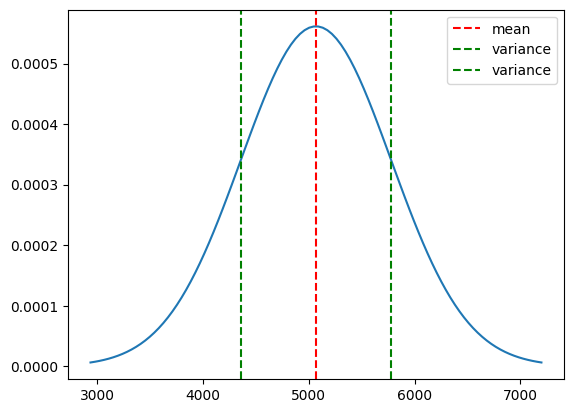

In [4]:
#reconstructing Gauss from fit
plt.plot(x, gauss_pdf(x,scale,loc))
plt.axvline(scale, color='red', linestyle='--', label='mean')
plt.axvline(scale-loc, color='green', linestyle='--', label='variance')
plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [5]:
#analyze fit for cauchy

dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #x0 (peak value) for cauchy
print("scale:",scale) #gamma (the distance from the peak x0 where the PDF drops to half its maximum value) for cauchy

x = np.linspace(loc - 5*scale, loc + 5*scale, 500)

def cauchy_pdf(x,x0,gamma):
    
    Cauchy_data = 1 / (np.pi * gamma * (1 + ((x - x0)/gamma)**2))
    
    return Cauchy_data


(72.1785187923022, 1073.44949476017)
arg: ()
loc: 72.1785187923022
scale: 1073.44949476017


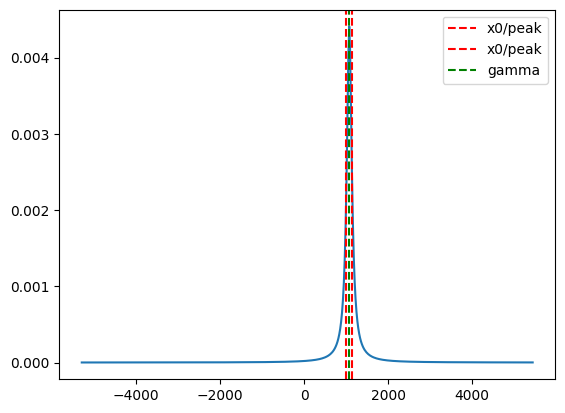

In [6]:
#reconstructing Cauchy from fit
plt.plot(x, cauchy_pdf(x,scale,loc))
plt.axvline(scale-loc, color='red', linestyle='--', label='x0/peak')
plt.axvline(scale+loc, color='red', linestyle='--', label='x0/peak')
plt.axvline(scale, color='green', linestyle='--', label='gamma')
#plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [26]:
# how to determine which fit is the best?

#GAUSS
#gauss_dist = getattr(scipy.stats, "gauss") #creates an object according to the parameters
#print(dist)
gauss_params = scipy.stats.norm.fit(data,method="mle")

#CAUCHY
#cauchy_dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
cauchy_params = scipy.stats.cauchy.fit(data,method="mle")


#Log Likelihood
#---> Compares how well the Model fits
#higher == better
loglik_gauss = np.sum(norm.logpdf(data, *gauss_params))
loglik_cauchy = np.sum(cauchy.logpdf(data, *cauchy_params))

print(f"Log-likelihood (Gauss): {loglik_gauss}")
print(f"Log-likelihood (Cauchy): {loglik_cauchy}")


#Akaikon Information Criterion (AIC)
#uses Loglikelihood values
#-> for models of different complexity (different amount of parameters)
#AIC helps you avoid being tricked by a model that fits well only because it's more complex
#lower == better

def aic(loglik, num_params):
    print(loglik,num_params)
    aic = 2 * num_params - 2 * loglik
    print(aic)
    return aic

aic_gauss = aic(loglik_gauss, 2)
aic_cauchy = aic(loglik_cauchy, 2)

print(f"AIC (Gauss): {aic_norm}")
print(f"AIC (Cauchy): {aic_cauchy}")

#Bayesian Information Criterion (BIC)


#Cramer von Mises
#More balanced than Anderson or KS: cares about both center and tails
#smaller == better
cvm_gauss = scipy.stats.cramervonmises(data, 'norm')
cvm_cauchy = scipy.stats.cramervonmises(data, 'cauchy')

print(f"CVM (Gauss): {cvm_gauss}")
print(f"CVM (Cauchy): {cvm_cauchy}")

#Kolmogorov Smirnov ->>> not suitable/ limited
# anderson ---> not suitable for cauchy

#scipy.stats.cramervonmises?



Log-likelihood (Gauss): -1283.4802755119795
Log-likelihood (Cauchy): -1237.3563776727024
-1283.4802755119795 2
2570.960551023959
-1237.3563776727024 2
2478.7127553454047
AIC (Gauss): 2570.960551023959
AIC (Cauchy): 2478.7127553454047
CVM (Gauss): CramerVonMisesResult(statistic=11.27312062988594, pvalue=3.4848057772762786e-10)
CVM (Cauchy): CramerVonMisesResult(statistic=10.947740469079005, pvalue=1.9998869227322302e-10)


In [8]:
def best_fit(data,PDF = "norm"):
    
    data = data.dropna()
    
    if PDF == "norm":
        params = scipy.stats.norm.fit(data,method="mle")
        #Log Likelihood Gauss
        loglik = np.sum(norm.logpdf(data, *params))
    elif PDF == "cauchy":
        params = scipy.stats.cauchy.fit(data,method="mle")
        #Log Likelihood Cauchy
        loglik = np.sum(cauchy.logpdf(data, *params))
    else:
        print("invalid PDF value")
    
    
    #Akaikon Information Criterion (AIC)
    aic = 2 * 2 - 2 * loglik
    
    #Cramer von Mises
    cvm = scipy.stats.cramervonmises(data, PDF)
    cvm = [cvm.statistic,cvm.pvalue]  #cvm gives an object --> transform to simple list
    
                                        
    return loglik, aic, cvm

In [15]:
ll_gauss, aic_gauss, cvm_gauss = best_fit(MONTH["delta_high"],"norm")
#ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

type(cvm_gauss)
cvm_gauss.statistic
cvm_gauss.pvalue

3.4848057772762786e-10

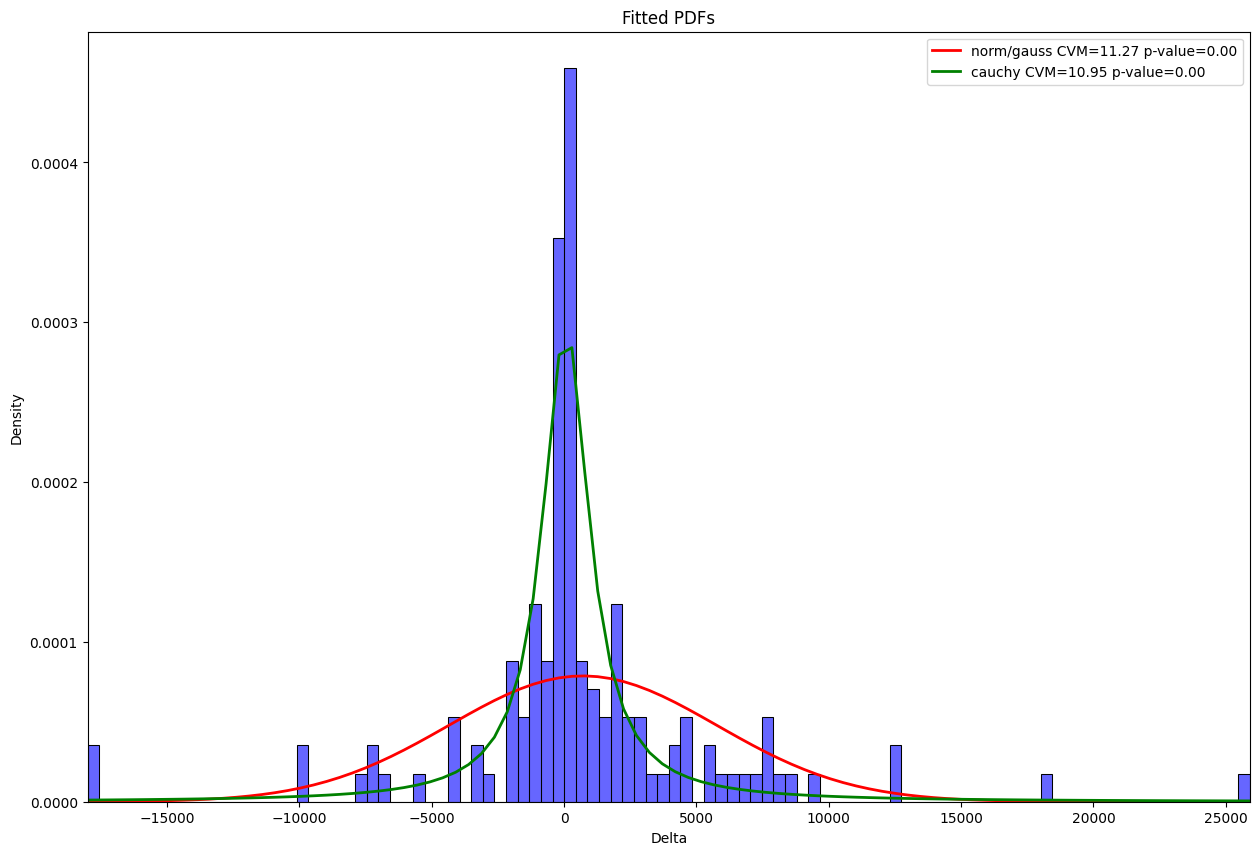

In [29]:
# GAUSS FIT
from scipy.stats import norm, cauchy, lognorm, expon, kstest
data = MONTH["delta_high"].dropna()

#plt.hist(data, bins=100, density=True)
ll_gauss, aic_gauss, cvm_gauss = best_fit(data,"norm")
ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

plt.figure(figsize=(15,10))

sb.histplot(data, bins=100, kde=False, stat = "density", color = 'blue', alpha=0.6)


    
params_gauss, pdf_fitted_gauss, x_gauss = Mandelbrot.gauss_pdf(data)
params_cauchy, pdf_fitted_cauchy, x_cauchy = Mandelbrot.cauchy_pdf(data)

    
plt.plot(x_gauss, pdf_fitted_gauss, 'r', linewidth=2, 
         label="norm/gauss CVM=%.2f p-value=%.2f"%(cvm_gauss[0],cvm_gauss[1]))
plt.plot(x_cauchy, pdf_fitted_cauchy, 'g', linewidth=2, 
         label="cauchy CVM=%.2f p-value=%.2f"%(cvm_cauchy[0],cvm_cauchy[1]))


plt.xlim(min(data),max(data))
plt.legend(loc="upper right")
plt.xlabel('Delta')
plt.ylabel('Density')
plt.title('Fitted PDFs')
#plt.savefig("PDF.png")
plt.show()

In [34]:
def plot_fit(DF):
    from scipy.stats import norm, cauchy, lognorm, expon, kstest
    data = DF["delta_high"].dropna()

    #plt.hist(data, bins=100, density=True)
    ll_gauss, aic_gauss, cvm_gauss = best_fit(data,"norm")
    ll_cauchy, aic_cauchy, cvm_cauchy = best_fit(data,"cauchy")

    fig = plt.figure(figsize=(15,10))

    sb.histplot(data, bins=500, kde=False, stat = "density", color = 'blue', alpha=0.6)
    
    params_gauss, pdf_fitted_gauss, x_gauss = Mandelbrot.gauss_pdf(data)
    params_cauchy, pdf_fitted_cauchy, x_cauchy = Mandelbrot.cauchy_pdf(data)

    
    plt.plot(x_gauss, pdf_fitted_gauss, 'r', linewidth=2, 
         label="norm/gauss CVM=%.2f p-value=%.5f"%(cvm_gauss[0],cvm_gauss[1]))
    plt.plot(x_cauchy, pdf_fitted_cauchy, 'g', linewidth=2, 
         label="cauchy CVM=%.2f p-value=%.5f"%(cvm_cauchy[0],cvm_cauchy[1]))


    plt.xlim(min(data),max(data))
    plt.legend(loc="upper right")
    plt.xlabel('Delta')
    plt.ylabel('Density')
    plt.title('Fitted PDFs')
    
    return fig

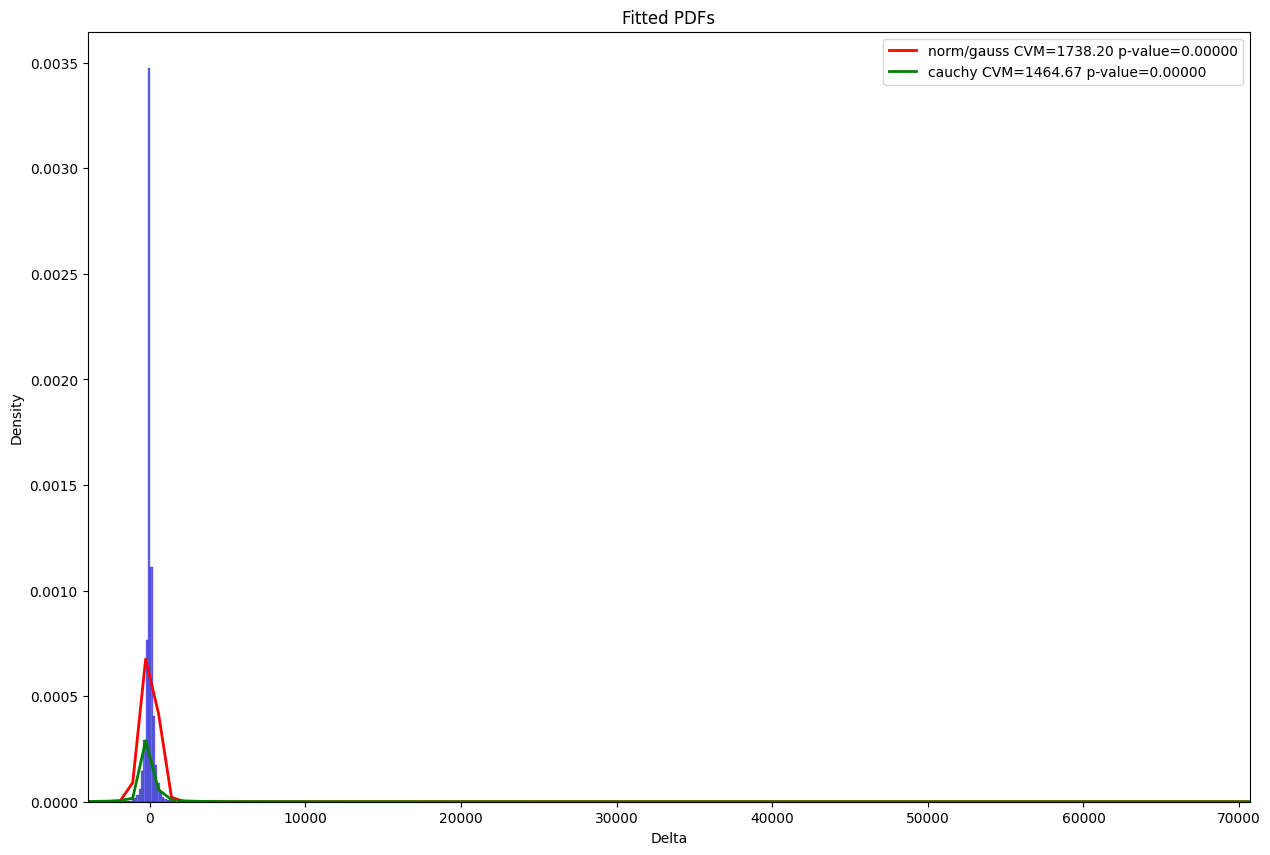

In [35]:
fig = plot_fit(HOUR)


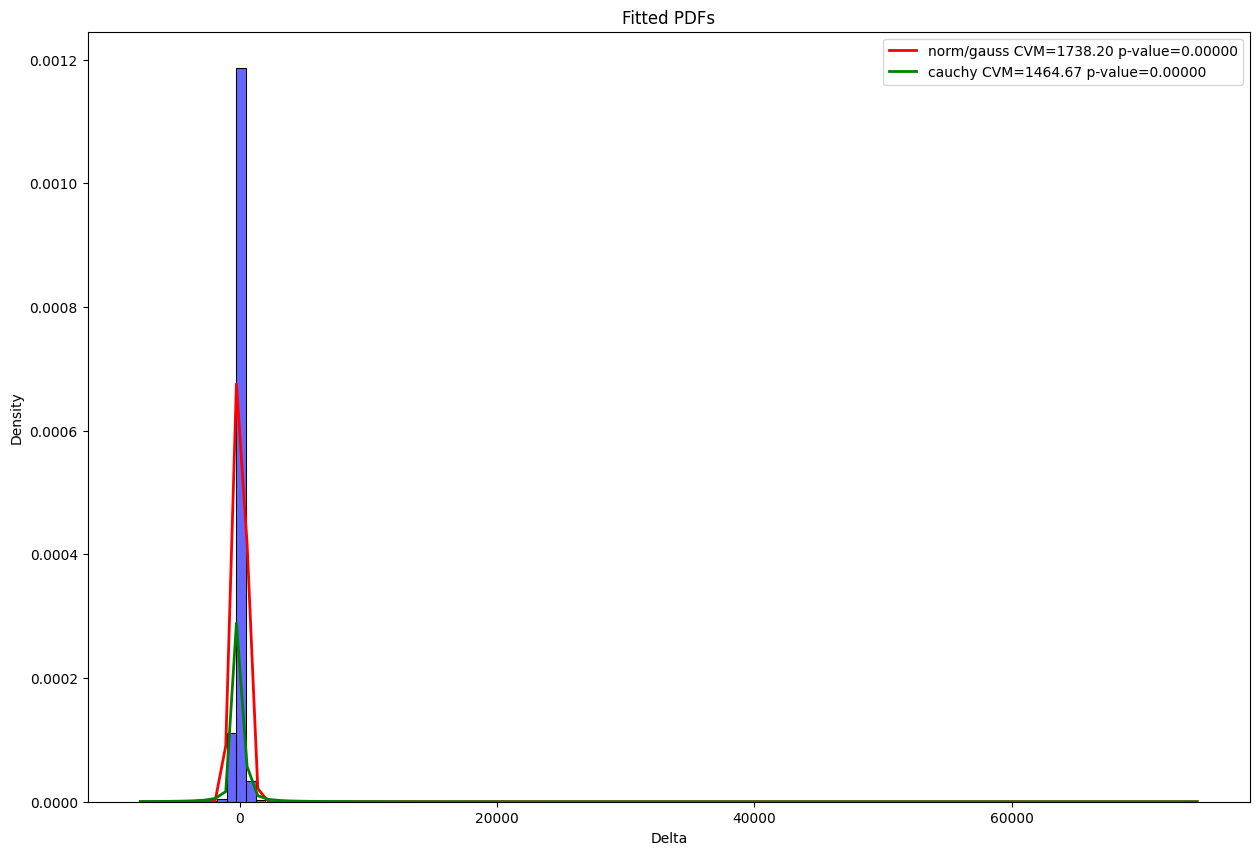

In [25]:
fig = plot_fit(HOUR)

In [26]:
HOUR.head()

,unix,date,high,low,delta_high,delta_low
2,1609700400,2021-01-03 19:00:00,26028.02,25959.78,NaN,NaN
62,1609704000,2021-01-03 20:00:00,25924.91,25896.15,-103.11,-63.63
122,1609707600,2021-01-03 21:00:00,26670.77,26621.29,745.86,725.14
182,1609711200,2021-01-03 22:00:00,26580.99,26478.00,-89.78,-143.29
242,1609714800,2021-01-03 23:00:00,26224.14,26143.79,-356.85,-334.21


# 3. The memory of data

## old patterns correlate with newer patterns

## Hurt exponent / Variance